# Mountain Clustering
_María Camila Vásquez Correa_

### Necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
n = 150  # Number of samples
N = 4    # Number of features
X = load_iris().data.T
# Normalization
for i in range(N):
    X[i] = X[i]/np.max(X[i])
X = X.T
Y = pd.read_csv('iris_embbeding.csv').values
X1 = pd.read_csv('high_dimension_iris.csv').values

In [14]:
def plot_mountains(X, Xi, m, margin, limits, zlim, title, cmap='viridis'):
    # Create a new figure and Add an axes to the current figure
    num = 100 + 1
    X_ = 0
    Y_ = 1
    fig_size = 8
    fig = plt.figure(figsize=(fig_size, fig_size))
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(Xi[:, X_], Xi[:, Y_], m, cmap=cmap,
                    antialiased=False, shade=False, edgecolors='none',
                    vmin=zlim[0], vmax=zlim[1])

    # Axis Labels
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')

    # Axis Limits
    xlim = limits[:, X_]
    xlim = xlim[0] - margin, xlim[1] + margin
    ylim = limits[:, Y_]
    ylim = ylim[0] - margin, ylim[1] + margin

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)

    ax.set_title(title)

    ax.view_init(50, -140)
    
    plt.show()

In [9]:
metric = 'euclidean'
cmap = 'inferno'
margin = (1 / 12)
n_iter = 100

sigma = 1 / 2
beta = sigma

Xmin = X.min(axis=0)
Xmax = X.max(axis=0)

limits = np.c_[Xmin, Xmax].T

In [10]:
# Create a grid
xi = []

for i in range(N):
    xi += [np.linspace(Xmin[i], Xmax[i], 10)]

Xi = np.meshgrid(*xi)

Grid = np.concatenate([
    matrix.flatten().reshape(10 ** N, 1) for matrix in Xi
], axis=1)

In [11]:
# Mountain function
dist = cdist(Grid, X, metric)

m = dist / (2 * (sigma ** 2))
m = np.exp(-m).sum(axis=1)

In [12]:
# Limits
mmin, mmax = np.minimum(0, m.min()), m.max()
zlim = [mmin, mmax]

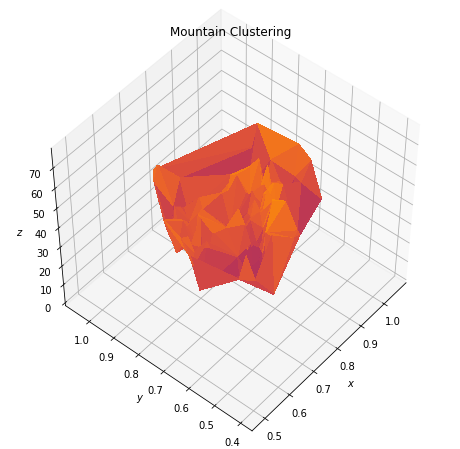

In [16]:
# Plot
i = 1
title = 'Mountain Clustering'

Xi = np.c_[[elem.flatten() for elem in Xi]].T

plot_mountains(X, X, m, margin, limits, zlim, title, cmap=cmap)

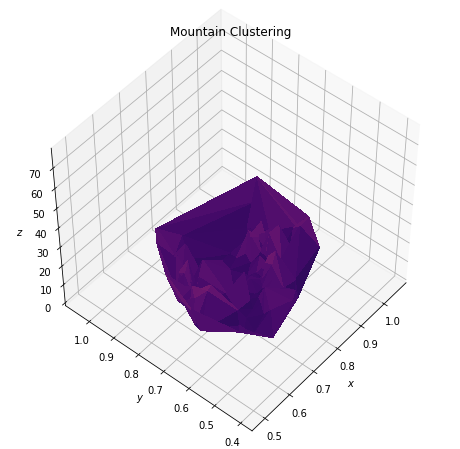

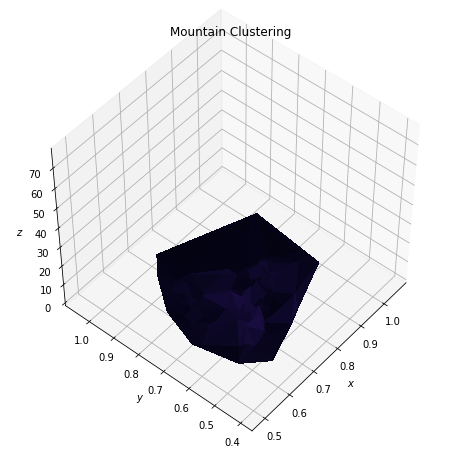

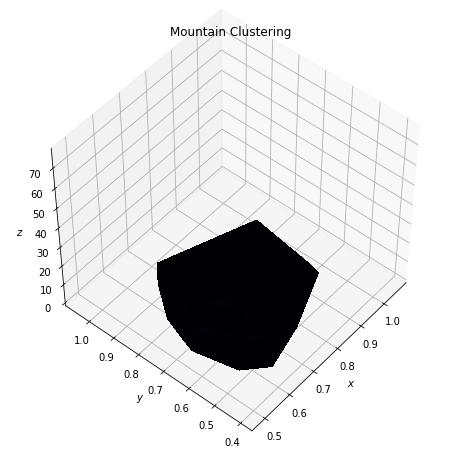

In [18]:
# Initialize clusters
C = np.zeros((0, N))
list_m = []

# Principal cycle
while m.max() > zlim[1] / 5 and i < n_iter:
    # Add cluster
    ind = np.argmax(m)
    C = np.r_[C, Grid[ind].reshape(1, N)]

    # Recompute density
    dm = cdist(Grid, C[-1].reshape(1, N), metric)
    dm = dm / (2 * (beta ** 2))
    dm = m[ind] * np.exp(-dm)

    m = m - dm.flatten()
    list_m += [m.max()]

    # Plot
    i += 1
    plot_mountains(X, X, m, margin, limits, zlim, title, cmap=cmap)


In [19]:
U = cdist(C, X, metric = metric).T 
U = np.argmin(U, axis=-1)  

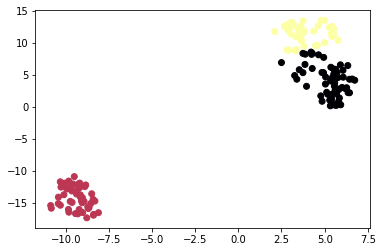

In [20]:
plt.scatter(Y[:, 0], Y[:, 1], c=U, cmap = cmap)
plt.show()